# **AltSchool of Data Science Karatu 2024 Second Semester Project Exam**

### **`Hypothesis Testing Simulation`**

Objective: Simulate A/B testing to understand the effects of different variables on user engagement. 

#### **`Generate random user data`**

In [4]:
# Import python libraries

import pandas as pd                            # for tabular manipulation of data
import numpy as np                             # for numerical computing of data
from scipy import stats                        # for statistical analysis of data
from scipy.stats import chi2_contingency       # to calculate Chi-square test
from datetime import datetime, timedelta       # for date and time manipulation of data 
import matplotlib.pyplot as plt                # for visualization of data
import seaborn as sns                          # for visualization of data


# Define function to generate a pandas DataFrame with specified number of users
def generate_random_user_data(num_users, start_date, end_date):
    """
    Generate random user data.

    Parameters:
    num_users (int): The number of users to generate data for.

    Returns:
    pd.DataFrame: A pandas DataFrame containing the generated user data.
    """
    try:
        # Set timeframe for webpage A/B Testing to 2-weeks of data collection
        timestamp = pd.date_range(start=start_date, end=end_date, freq='D')
        
        # Set the seed for reproducibility
        np.random.seed(0)
    
        # Define the columns for the user data
        columns = [                                       # create Dataframe datapoints
            'user_id',
            'web_page_id',
            'click_through_rate',
            'time_spent_on_page',
            'page_load_time'
            'conversion',
            'browser_type'
            'device_type'
            'operating_system'
            'age',
            'gender',
            'country',
            'city',
            'date'
        ]
    
        # Generate the user data
        data = {                                                                            # create a dictionary(key-value pair)
            'user_id': range(1, num_users + 1),
            'web_page_id': np.random.choice(['A', 'B'], num_users, p=[0.55, 0.45]),
            'click_through_rate': np.random.uniform(0, 1, num_users),
            'time_spent_on_page': np.random.uniform(0, 3600, num_users),  # in seconds
            'page_load_time': np.random.uniform(0, 120, num_users),  # in seconds
            'conversion': np.random.choice([0, 1], num_users, p=[0.8, 0.2]),
            'browser_type': np.random.choice(['Chrome', 'Firefox', 'Safari'], num_users, p=[0.6, 0.3, 0.1]),
            'device_type': np.random.choice(['Mobile', 'Desktop', 'Tablet'], num_users, p=[0.6, 0.3, 0.1]),
            'operating_system': np.random.choice(['Windows', 'macOS'], num_users, p=[0.8, 0.2]),
            'age': np.random.randint(18, 75, num_users),
            'gender': np.random.choice(['Male', 'Female'], num_users, p=[0.6, 0.4]),
            'country': np.random.choice(['USA', 'Canada', 'UK', 'Australia', 'Germany'], num_users, p=[0.6, 0.2, 0.14, 0.03, 0.03]),
            'city': np.random.choice(['New York', 'Los Angeles', 'Chicago', 'Houston', 'London', 'Toronto', 'Vancouver', 'Sydney', 'Munich'], num_users, p=[0.15, 0.1, 0.15, 0.15, 0.15, 0.1, 0.1, 0.05, 0.05]),
            'date': np.random.choice(timestamp, size=num_users)
            
        }
    
        # Create a pandas DataFrame from the user data
        df = pd.DataFrame(data)
    
        return df

    except ValueError as ve:
        print(f"ValueError: {ve}")
    except TypeError as te:
        print(f"TypeError: {te}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Set the start date for the 2-week period
start_date = '2024-12-08'

# Set the end date for the 2-week period
end_date = pd.to_datetime(start_date) + pd.DateOffset(days=13)

In [5]:
# Call function to generate random user data

num_users = 1000                                                      # number of users who visited the webpages
df = generate_random_user_data(num_users, start_date, end_date)       # generate webpage user data within a 2-week period
df.head()                                                             # view first 5 rows of webpage user data

,user_id,web_page_id,click_through_rate,time_spent_on_page,page_load_time,conversion,browser_type,device_type,operating_system,age,gender,country,city,date
0,1,A,0.592880,2921.466494,49.675499,0,Chrome,Mobile,Windows,33,Female,USA,Chicago,2024-12-18
1,2,B,0.010064,1713.902349,75.554196,0,Chrome,Mobile,Windows,44,Female,Canada,Los Angeles,2024-12-13
2,3,B,0.475826,1883.361564,93.430112,0,Chrome,Desktop,Windows,74,Female,USA,London,2024-12-16
3,4,A,0.708770,901.874111,102.186935,0,Chrome,Desktop,macOS,45,Male,USA,Los Angeles,2024-12-14
4,5,A,0.043975,2178.154861,97.969526,0,Chrome,Mobile,Windows,42,Female,USA,New York,2024-12-11


In [6]:
df.describe()   # statistical overview of randomly generated Dataframe

,user_id,click_through_rate,time_spent_on_page,page_load_time,conversion,age,date
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000
mean,500.500000,0.511350,1819.613312,58.043437,0.179000,45.100000,2024-12-14 14:06:43.200000
min,1.000000,0.000367,0.265318,0.008694,0.000000,18.000000,2024-12-08 00:00:00
25%,250.750000,0.255214,977.280661,28.819338,0.000000,31.000000,2024-12-11 00:00:00
50%,500.500000,0.519487,1802.186064,55.505970,0.000000,45.000000,2024-12-15 00:00:00
75%,750.250000,0.778098,2724.416620,88.050226,0.000000,59.000000,2024-12-18 00:00:00
max,1000.000000,0.998527,3599.870467,119.991738,1.000000,74.000000,2024-12-21 00:00:00
std,288.819436,0.299108,1032.799706,34.350101,0.383544,16.574097,NaN


In [7]:
# Define function to mimic real-world scenario by incorporating missing values
# by randomly removing data from generated user data

def randomly_remove_data(df, percentage=0.02):   # 2% of generated data will be removed randomly to account for data missing by design (MCAR)
    """
    Randomly remove a specified percentage of data from a Pandas DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame from which to remove data.
    percentage (float, optional): The percentage of data to remove. Defaults to 0.02 (2%).

    Returns:
    pd.DataFrame: The DataFrame with the specified percentage of data removed.
    """
    # Calculate the number of rows to remove
    num_rows_to_remove = int(len(df) * percentage)

    # Randomly select the rows to remove
    rows_to_remove = np.random.choice(df.index, size=num_rows_to_remove, replace=False)

    # Remove the selected rows from the DataFrame
    df_removed = df.drop(rows_to_remove)

    return df_removed

In [8]:
# Call function to create random user data for A/B Testing analysis      
real_world_df = randomly_remove_data(df)       # create new dataframe, real_world_df
real_world_df.head()                           # view first 5 rows of data

,user_id,web_page_id,click_through_rate,time_spent_on_page,page_load_time,conversion,browser_type,device_type,operating_system,age,gender,country,city,date
0,1,A,0.592880,2921.466494,49.675499,0,Chrome,Mobile,Windows,33,Female,USA,Chicago,2024-12-18
1,2,B,0.010064,1713.902349,75.554196,0,Chrome,Mobile,Windows,44,Female,Canada,Los Angeles,2024-12-13
2,3,B,0.475826,1883.361564,93.430112,0,Chrome,Desktop,Windows,74,Female,USA,London,2024-12-16
3,4,A,0.708770,901.874111,102.186935,0,Chrome,Desktop,macOS,45,Male,USA,Los Angeles,2024-12-14
4,5,A,0.043975,2178.154861,97.969526,0,Chrome,Mobile,Windows,42,Female,USA,New York,2024-12-11


In [38]:
# Define function to convert random user data in pandas Dataframe into csv format

def convert_to_csv(df, filename):
    """
    Convert the generated user data in pandas to CSV format.

    Parameters:
    df (pd.DataFrame): The pandas DataFrame containing the user data.
    filename (str): The filename for the CSV file.

    Returns:
    None
    """
    try:
        # Convert the DataFrame to CSV format
        df.to_csv(filename, index=False)

        print(f"User data successfully converted to CSV format and saved to {filename}")

    except FileNotFoundError:
        print(f"Error: The specified file path '{filename}' does not exist.")

    except PermissionError:
        print(f"Error: Permission denied to write to the file '{filename}'.")

    except KeyError:
        print(f"Error: Wrong variable filename for data to be converted to csv'{filename}'.")

    except OSError as e:
        print(f"Error: An OS-related error occurred while writing to the file '{filename}': {e}")

    except Exception as e:
        print(f"An unexpected error occurred while converting the DataFrame to a CSV file: {e}")


In [39]:
# Call function to convert random user data to CSV format
filename = "Damilola_project_data.csv"
convert_to_csv(real_world_df, filename)

Error: Permission denied to write to the file 'Damilola_project_data.csv'.


In [40]:
# Define function to subset dataframe using web_page_id column value (A and B)

def subset_dataframe_by_web_page_id(df, web_page_id_value):
    """
    Subset a Pandas DataFrame based on the values in the "Web page ID" column.

    Parameters:
    df (pd.DataFrame): The DataFrame to subset.
    web_page_id (str): The value of the "Web page ID" column to select.

    Returns:
    pd.DataFrame: The subsetted DataFrame.
    """
    return df[df['web_page_id'] == web_page_id_value]

In [41]:
# Call function to subset random user dataframe based on web_page_id column value (A and B) 
# to create two dataframes, df_A and df_B

df_A = subset_dataframe_by_web_page_id(real_world_df, 'A')
df_B = subset_dataframe_by_web_page_id(real_world_df, 'B')

df_A   # view new dataframe having web_page_id value, A, indicating Web Page A design

,user_id,web_page_id,click_through_rate,time_spent_on_page,page_load_time,conversion,browser_type,device_type,operating_system,age,gender,country,city,date
0,1,A,0.592880,2921.466494,49.675499,0,Chrome,Mobile,Windows,33,Female,USA,Chicago,2024-12-18
3,4,A,0.708770,901.874111,102.186935,0,Chrome,Desktop,macOS,45,Male,USA,Los Angeles,2024-12-14
4,5,A,0.043975,2178.154861,97.969526,0,Chrome,Mobile,Windows,42,Female,USA,New York,2024-12-11
6,7,A,0.520081,2078.222452,99.406746,0,Chrome,Mobile,Windows,23,Male,USA,New York,2024-12-12
9,10,A,0.953676,1501.307068,74.751206,1,Chrome,Desktop,macOS,19,Female,Canada,Vancouver,2024-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,993,A,0.027653,1034.254374,22.532436,0,Firefox,Mobile,Windows,66,Male,Canada,Chicago,2024-12-14
993,994,A,0.660339,3166.853553,48.561580,0,Firefox,Mobile,Windows,55,Female,USA,Chicago,2024-12-15
995,996,A,0.791282,3390.073456,41.956724,0,Chrome,Mobile,macOS,39,Male,Canada,Vancouver,2024-12-18
996,997,A,0.721198,1966.077898,52.184836,0,Chrome,Mobile,macOS,46,Male,USA,London,2024-12-11


In [42]:
df_B   # view new dataframe having web_page_id value, B, indicating Web Page B design

,user_id,web_page_id,click_through_rate,time_spent_on_page,page_load_time,conversion,browser_type,device_type,operating_system,age,gender,country,city,date
1,2,B,0.010064,1713.902349,75.554196,0,Chrome,Mobile,Windows,44,Female,Canada,Los Angeles,2024-12-13
2,3,B,0.475826,1883.361564,93.430112,0,Chrome,Desktop,Windows,74,Female,USA,London,2024-12-16
5,6,B,0.879521,1090.457311,19.929251,0,Firefox,Mobile,macOS,59,Male,USA,Houston,2024-12-19
7,8,B,0.030661,610.841216,7.035487,0,Chrome,Mobile,Windows,31,Female,Canada,Toronto,2024-12-15
8,9,B,0.224414,574.088732,24.020482,0,Chrome,Desktop,Windows,31,Female,USA,Houston,2024-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,988,B,0.359107,92.655992,7.146234,1,Chrome,Desktop,Windows,29,Female,Canada,London,2024-12-09
989,990,B,0.900410,2017.345334,7.413488,0,Safari,Tablet,Windows,59,Male,USA,Los Angeles,2024-12-17
994,995,B,0.414439,1025.737390,14.388469,0,Chrome,Desktop,Windows,36,Male,USA,New York,2024-12-10
997,998,B,0.480108,1165.009354,99.600354,0,Firefox,Desktop,macOS,25,Male,USA,New York,2024-12-15


In [43]:
# Define function to subset df_A and df_B pandas dataframe into webpage_A and webpage_B
# based on columns click_through_rate, time_spent_on_page, and conversion respectively
# for A/B Testing

def subset_data(df):
    """
    Subset the data with columns click_through_rate, time_spent_on_page, and conversion.

    Parameters:
    df (pd.DataFrame): The DataFrame generated above.

    Returns:
    pd.DataFrame: The subsetted DataFrame with columns click_through_rate, time_spent_on_page, and conversion.
    """
    subset_df = df[['click_through_rate', 'time_spent_on_page', 'conversion']]
    return subset_df

In [44]:
# Call function to subset data having web_page_id with value, A

webpage_A = subset_data(df_A)      # subset the data
webpage_A                          # view subsetted dataframe having webpage ID, A only

,click_through_rate,time_spent_on_page,conversion
0,0.592880,2921.466494,0
3,0.708770,901.874111,0
4,0.043975,2178.154861,0
6,0.520081,2078.222452,0
9,0.953676,1501.307068,1
...,...,...,...
992,0.027653,1034.254374,0
993,0.660339,3166.853553,0
995,0.791282,3390.073456,0
996,0.721198,1966.077898,0


In [45]:
# Call function to subset data having web_page_id with value, B

webpage_B = subset_data(df_B)          # subset the data
webpage_B                              # view subsetted dataframe having webpage ID, B only

,click_through_rate,time_spent_on_page,conversion
1,0.010064,1713.902349,0
2,0.475826,1883.361564,0
5,0.879521,1090.457311,0
7,0.030661,610.841216,0
8,0.224414,574.088732,0
...,...,...,...
987,0.359107,92.655992,1
989,0.900410,2017.345334,0
994,0.414439,1025.737390,0
997,0.480108,1165.009354,0


#### **`A/B testing for web page A and B designs`**

In [47]:
# Define function to perform A/B testing for two web-pages A and B
# factoring click_through_rate, time_spent_on_page and conversion
    
def perform_hypothesis_testing(data_a, data_b):            # defining function to perform hypothesis testing
    """
    Perform A/B testing for two web pages.

    Parameters:
    data_a (pd.DataFrame): Data for page A with columns 'click_through_rate', 'time_spent_on_page', and 'conversion'.
    data_b (pd.DataFrame): Data for page B with columns 'click_through_rate', 'time_spent_on_page', and 'conversion'.

    Returns:
    dict: Results of the A/B testing, including p-values and confidence intervals for each metric.
    """

    # Define the metrics to test
    metrics = ['click_through_rate', 'time_spent_on_page', 'conversion']     
    
    # Initialize the results dictionary
    results = {}

    # Perform A/B testing for each metric
    for metric in metrics:
        # Perform a two-sample t-test
        t_stat, p_val = stats.ttest_ind(data_a[metric], data_b[metric])
        
        # Calculate the confidence interval
        ci = stats.t.interval(0.95, len(data_a[metric]) + len(data_b[metric]) - 2, loc=np.mean(data_a[metric]), scale=stats.sem(data_a[metric]))
       
        # Store the result
        results[metric] = {
            'p_value': p_val,
            'confidence_interval': ci,
            't_statistic': t_stat
        }
        if p_val < 0.05:
            results[metric]['statistically_significant'] = True
        else:
            results[metric]['statistically_significant'] = False
    return results


# Perform hypothesis testing
results = perform_hypothesis_testing(webpage_A, webpage_B)

# Print the results
print("Hypothesis Testing Results:")
for metric, result in results.items():
    print(f"Metric: {metric}")
    print(f"P-Value: {result['p_value']}")
    print(f"Confidence Interval: {result['confidence_interval']}")
    print(f"T-Statistic: {result['t_statistic']}")
    if 'statistically_significant' in result:
        print(f"Statistically Significant: {result['statistically_significant']}")
    print()

Hypothesis Testing Results:
Metric: click_through_rate
P-Value: 0.34366270606011273
Confidence Interval: (0.47769495907030984, 0.5272442387267373)
T-Statistic: -0.9474123925727375
Statistically Significant: False

Metric: time_spent_on_page
P-Value: 0.9895837155885485
Confidence Interval: (1732.750007202326, 1905.6415822112542)
T-Statistic: 0.013058585582721856
Statistically Significant: False

Metric: conversion
P-Value: 0.6021008465000874
Confidence Interval: (0.139382037822516, 0.2024361439956658)
T-Statistic: -0.5215513239969926
Statistically Significant: False



In [48]:
# Define function to calculate conversion count of web_page_id column A and B

def calculate_conversion_counts(df):
    """
    Calculate the count of positive conversions and total count for webpage A and webpage B.

    Parameters:
    df (pd.DataFrame): DataFrame containing 'webpage_id' and 'conversion' columns.

    Returns:
    dict: Dictionary containing the counts for webpage A and webpage B.
    """
    # Count of values that have webpage ID of A and conversion 1
    count_A_positive = len(df[(df['web_page_id'] == 'A') & (df['conversion'] == 1)])

    # Total count of webpage ID A
    total_count_A = len(df[df['web_page_id'] == 'A'])

    # Count of values that have webpage ID of B and conversion 1
    count_B_positive = len(df[(df['web_page_id'] == 'B') & (df['conversion'] == 1)])

    # Total count of webpage ID B
    total_count_B = len(df[df['web_page_id'] == 'B'])

    # Return the counts as a dictionary
    return {
        'Web_Page_A': {'positive_conversions': count_A_positive, 'total_count': total_count_A},
        'Web_Page_B': {'positive_conversions': count_B_positive, 'total_count': total_count_B}
    }


In [49]:
# Call function to give count of positive conversions of Web_page_id column (A and B)

conversion_values = calculate_conversion_counts(real_world_df)    
conversion_values                                    # view web page A and B conversion count

{'Web_Page_A': {'positive_conversions': 94, 'total_count': 550},
 'Web_Page_B': {'positive_conversions': 79, 'total_count': 430}}

In [50]:
# Assign the variable for Chi-square test
conversions_A = 94                                   # number of users who clicked web page A and donated funds
non_conversions_A = 550                              # number of users who clicked web page A but did not donate funds
conversions_B = 79                                   # number of users who clicked web page B and donated funds
non_conversions_B = 430                              # number of users who clicked web page B and did not donate funds

visitors_A = conversions_A + non_conversions_A       # total number of users who visited web page A
visitors_B = conversions_B + non_conversions_B       # total number of users who visited web page B

In [81]:
# Define the function to perform the Chi-Square test

def chi_square_test(a, b, c, d, alpha=0.05):
    """
    Perform a Chi-Square test for a 2x2 contingency table.

    Parameters:
    a (int): Number of conversions for webpage A
    b (int): Number of non-conversions for webpage A
    c (int): Number of conversions for webpage B
    d (int): Number of non-conversions for webpage B
    alpha (float, optional): Significance level. Defaults to 0.05.

    Returns:
    tuple: A tuple containing the Chi-Square statistic, p-value, and a boolean indicating whether to reject the null hypothesis.
    """

    # Create the contingency table
    table = np.array([[a, b], [c, d]])

    # Perform the Chi-square test
    chi2, p, dof, expected = chi2_contingency(table)

    # Determine whether to reject the null hypothesis
    reject_null = p < alpha
    
    return chi2, p, reject_null

# Define the data
conversions_A = 94
non_conversions_A = 550
conversions_B = 79
non_conversions_B = 430

visitors_A = conversions_A + non_conversions_A
visitors_B = conversions_B + non_conversions_B

# Define the function to calculate the conversion rate
def calculate_conversion_rate(conversions, visitors):
    """
    Perform a calculation to return conversion rate as percentage.

    Parameters:
    a (int): Number of conversions for webpage
    b (int): Number of visitors for webpage

    Returns:
    tuple: A float containing the conversion rate.
    """
    conversion_rate = (conversions / visitors) * 100
    return round(conversion_rate, 2)
    
# Calculate the conversion rates
conversion_rate_A = calculate_conversion_rate(conversions_A, visitors_A)
conversion_rate_B = calculate_conversion_rate(conversions_B, visitors_B)

# Perform the Chi-Square test
chi2, p, reject_null = chi_square_test(conversions_A, non_conversions_A, conversions_B, non_conversions_B)

# Print the results
print(f"Conversion Rate for Webpage A: {conversion_rate_A}%")
print(f"Conversion Rate for Webpage B: {conversion_rate_B}%")
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Reject Null Hypothesis: {reject_null}")

# Interpret the results
if reject_null:
    print("Reject the null hypothesis. The conversion rates are statistically significantly different.")
else:
    print("Fail to reject the null hypothesis. The conversion rates are not statistically significantly different.")


Conversion Rate for Webpage A: 14.6%
Conversion Rate for Webpage B: 15.52%
Chi-Square Statistic: 0.1248894069760855
p-value: 0.723790869183103
Reject Null Hypothesis: False
Fail to reject the null hypothesis. The conversion rates are not statistically significantly different.


#### **`Visualize the result`**

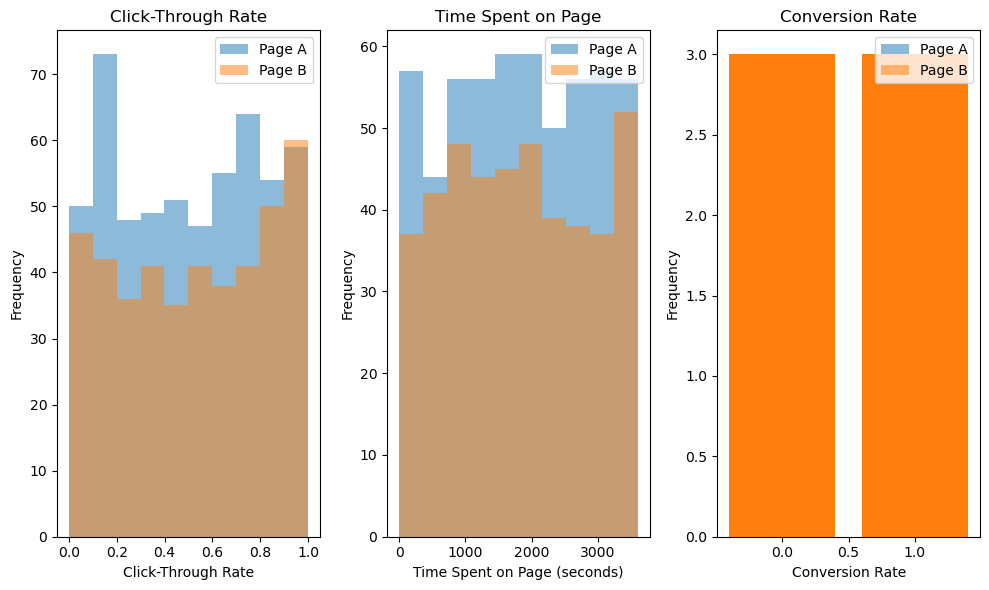

In [83]:
# Visualize the click_through_rate, time_spent_on_page and conversion data

plt.figure(figsize=(10, 6))                                                # size of chart
plt.subplot(1, 3, 1)                                                       # selecting plot position in multiple plot frame
plt.hist(webpage_A['click_through_rate'], alpha=0.5, label='Page A')       # chart type to visualize webpage A 
plt.hist(webpage_B['click_through_rate'], alpha=0.5, label='Page B')       # chart type to visualize webpage A
plt.legend()                                                               # description of chart variables  
plt.title('Click-Through Rate')                                            # title of chart
plt.xlabel('Click-Through Rate')                                           # chart horizontal axis label
plt.ylabel('Frequency')                                                    # chart vertical axis label

plt.subplot(1, 3, 2)                                                       # select plot position in multiple plot frame      
plt.hist(webpage_A['time_spent_on_page'], alpha=0.5, label='Page A')       # chart type to visualize webpage A
plt.hist(webpage_B['time_spent_on_page'], alpha=0.5, label='Page B')       # chart type to visualize webpage B
plt.legend()                                                               # description of chart variables
plt.title('Time Spent on Page')                                            # title of chart
plt.xlabel('Time Spent on Page (seconds)')                                 # chart horizontal axis label
plt.ylabel('Frequency')                                                    # chart vertical axis label

plt.subplot(1, 3, 3)                                                       # select plot position in multiple plot frame
plt.bar(webpage_A['conversion'], alpha=0.5, label='Page A',height=3)       # chart type to visualize webpage A
plt.bar(webpage_B['conversion'], alpha=0.5, label='Page B',height=3)       # chart type to visualize webpage B
plt.legend()                                                               # description of chart variables
plt.title('Conversion Rate')                                               # title of chart
plt.xlabel('Conversion Rate')                                              # chart horizontal axis label
plt.ylabel('Frequency')                                                    # chart vertical axis label 

plt.tight_layout()
plt.show()                                                                 # call to visualize chart

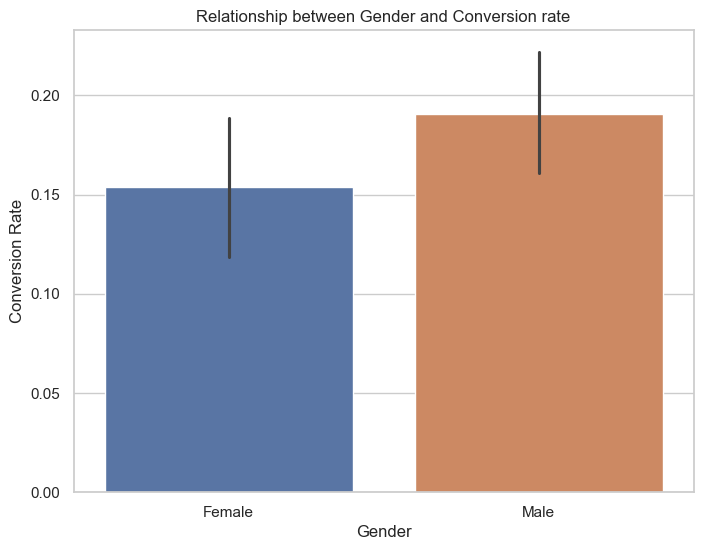

In [84]:
sns.set(style="whitegrid")                                                       # define plot area

plt.figure(figsize=(8,6))                                                        # size of chart
sns.barplot(x="gender", y="conversion", hue='gender', data=real_world_df)        # chart type

plt.title('Relationship between Gender and Conversion rate')                     # title of chart
plt.xlabel('Gender')                                                             # chart horizontal axis label
plt.ylabel('Conversion Rate')                                                    # chart vertical axis label

plt.show()                                                                       # call to visualize chart

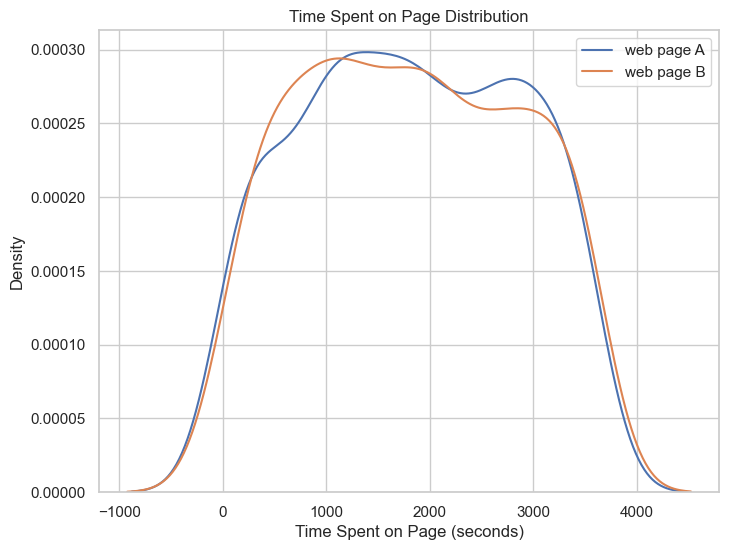

In [85]:
# Visualize total time, users spent on web page A and web page B designs

sns.set(style="whitegrid")                                                # define plot area 

plt.figure(figsize=(8,6))                                                 # chart size
sns.kdeplot(data=webpage_A, x="time_spent_on_page", label="web page A")
sns.kdeplot(data=webpage_B, x="time_spent_on_page", label="web page B")

plt.title('Time Spent on Page Distribution')                              # title of chart
plt.xlabel('Time Spent on Page (seconds)')                                # chart horizontal axis label
plt.ylabel('Density')                                                     # chart vertical axis label
plt.legend()                                                              # description of chart variables

plt.show()                                                               # call to visualize chart

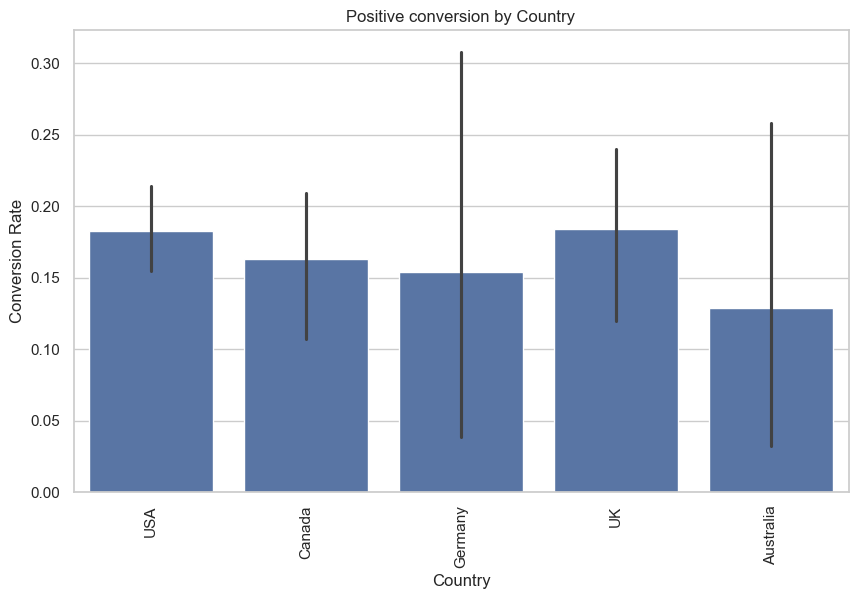

In [86]:
# Visualize country location where users visited web page A and web page B from

sns.set(style="whitegrid")                                        # define plot area 

plt.figure(figsize=(10,6))                                        # size of plot
sns.barplot(x="country", y="conversion", data=real_world_df)      # type of chart adopted from seaborn library

plt.title('Positive conversion by Country')                       # title of chart
plt.xlabel('Country')                                             # chart horizontal axis label
plt.ylabel('Conversion Rate')                                     # chart vertical axis label

plt.xticks(rotation=90)                                           # Rotate x-axis labels for better readability

plt.show()                                                        # call to visualize chart

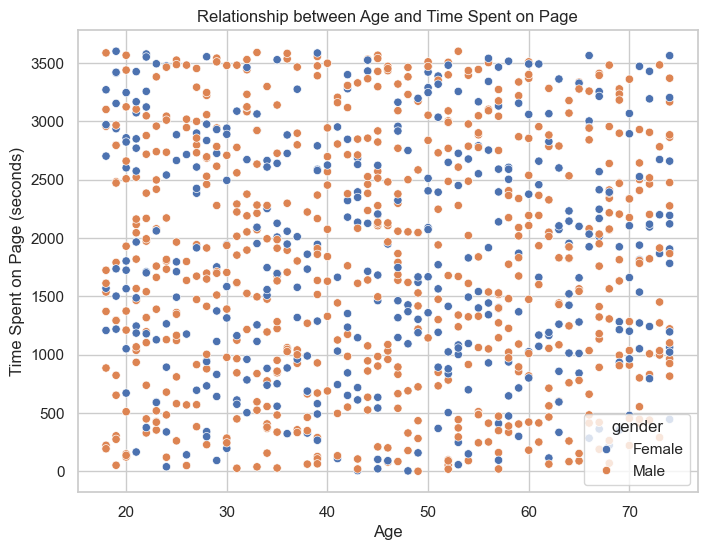

In [87]:
# Visualize relationship between age of users and their time spent on the web page

sns.set(style="whitegrid")                                                           # define plot area 

plt.figure(figsize=(8,6))                                                            # size of chart  
sns.scatterplot(x="age", y="time_spent_on_page", hue='gender', data=real_world_df)   # type of chart

plt.title('Relationship between Age and Time Spent on Page')                         # title of chart
plt.xlabel('Age')                                                                    # chart horizontal axis label
plt.ylabel('Time Spent on Page (seconds)')                                           # chart vertical axis label   

plt.show()                                                                           # call to visualize chart

#### **`Statistical Analysis for insight`** 

In [89]:
webpage_A['conversion'].mean()       # Average number of users who had positive conversion on webpage A design

0.1709090909090909

In [90]:
webpage_A['conversion'].describe()       # statistical overview of users who had positive conversion on webpage A design

count    550.000000
mean       0.170909
std        0.376772
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: conversion, dtype: float64

In [91]:
webpage_B['conversion'].mean()     # Average number of users who had positive conversion on webpage B design

0.18372093023255814

In [92]:
webpage_B['conversion'].describe()     # statistical overview of users who had positive conversion on webpage B design

count    430.000000
mean       0.183721
std        0.387708
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: conversion, dtype: float64

In [93]:
webpage_A['click_through_rate'].mean()    # Average number of users who clicked on the call-to-action on webpage A design

0.5024695988985236

In [94]:
webpage_A['click_through_rate'].describe()    # statistical overview of users who clicked on the call-to-action on webpage A design

count    550.000000
mean       0.502470
std        0.296076
min        0.000367
25%        0.228619
50%        0.512379
75%        0.766650
max        0.998527
Name: click_through_rate, dtype: float64

In [95]:
webpage_B['click_through_rate'].mean()    # Average number of users who clicked on the call-to-action on webpage B design

0.5207232442519208

In [96]:
webpage_B['click_through_rate'].describe()    # statistical overview of users who clicked on the call-to-action on webpage B design

count    430.000000
mean       0.520723
std        0.303386
min        0.000664
25%        0.273445
50%        0.526196
75%        0.799637
max        0.997994
Name: click_through_rate, dtype: float64

In [97]:
webpage_A['time_spent_on_page'].describe()    # statistical overview of users who spent time on webpage A design

count     550.000000
mean     1819.195795
std      1033.092689
min         0.265318
25%       988.985458
50%      1807.595854
75%      2724.537499
max      3599.870467
Name: time_spent_on_page, dtype: float64

In [98]:
webpage_B['time_spent_on_page'].describe()    # statistical overview of users who spent time on webpage B design

count     430.000000
mean     1818.325976
std      1036.866490
min         3.251828
25%       952.993649
50%      1788.724224
75%      2716.228592
max      3599.816293
Name: time_spent_on_page, dtype: float64

C:\Users\DAMILOLA\AppData\Local\Temp\ipykernel_15548\4279738573.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_time_spent = real_world_df.groupby('Age_Group')['time_spent_on_page'].mean()


Age_Group
18-40    1797.308414
41-75    1830.991130
Name: time_spent_on_page, dtype: float64


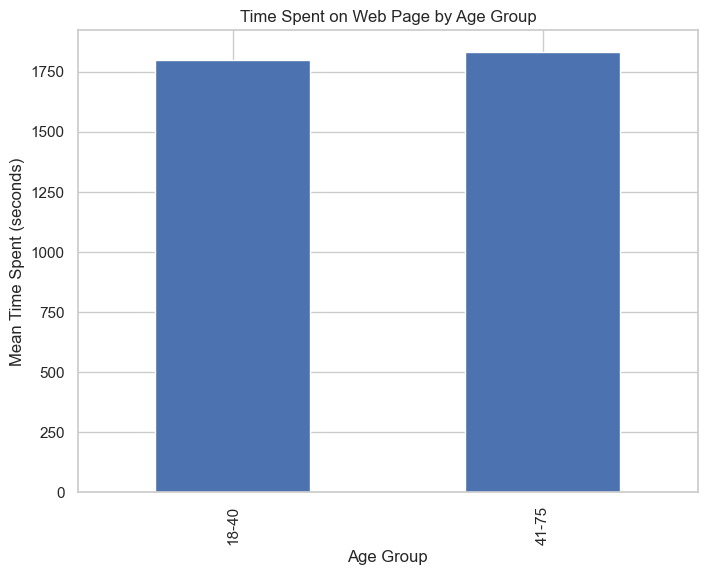

In [99]:
# Code to extract insight from age data to determine whether younger people (18-40 years of age)
# spent more time on the website or older people (41 to 75 years of age)

# Define age groups
age_groups = [(18, 40), (41, 75)]

# Create a new column for age groups
real_world_df['Age_Group'] = pd.cut(real_world_df['age'], bins=[18, 40, 75], labels=['18-40', '41-75'])

# Group by age group and calculate mean time spent
mean_time_spent = real_world_df.groupby('Age_Group')['time_spent_on_page'].mean()

# Print the results
print(mean_time_spent)

# Plot a bar chart
plt.figure(figsize=(8, 6))
mean_time_spent.plot(kind='bar')
plt.title('Time Spent on Web Page by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Time Spent (seconds)')
plt.show()